In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar los datos
base = pd.read_excel("C:/Users/wilme/Documents/Maestria/Proyecto Capstone/base_eventos.xlsx")
base.head()

,FECHA DEL EVENTO,AÑO,MES,PROVINCIA,CODIFICACION PROVINCIAL,EVENTO,CAUSA,CATEGORIA DEL EVENTO,CALIFICACION EVENTO PELIGROSO,NUM EVENTOS
0,2010-01-07,2010,1,Tungurahua,18,ACTIVIDAD VOLCÁNICA,PROCESO ERUPTIVO,NATURAL,Nivel 1,1
1,2010-01-08,2010,1,Galápagos,20,TORMENTA ELÉCTRICA,CONDICIONES ATMOSFÉRICAS,ÉPOCA LLUVIOSA,Nivel 1,2
2,2010-01-20,2010,1,Esmeraldas,8,INUNDACIÓN,LLUVIAS,ÉPOCA LLUVIOSA,Nivel 2,1
3,2010-02-06,2010,2,Manabí,13,INUNDACIÓN,LLUVIAS,ÉPOCA LLUVIOSA,Nivel 1,1
4,2010-02-06,2010,2,Santo Domingo De Los Tsáchilas,23,INUNDACIÓN,LLUVIAS,ÉPOCA LLUVIOSA,Nivel 1,1


In [3]:
year_to_remove = 2023  # Año que quieres eliminar
data = base[base['AÑO'] != year_to_remove]

provincia_seleccionada = 'Guayas'
data1 = data[data['PROVINCIA'] == provincia_seleccionada]

# Convertir la columna 'FECHA DEL EVENTO' a datetime
data1['FECHA DEL EVENTO'] = pd.to_datetime(data1['FECHA DEL EVENTO'])

# Crear una columna 'AÑO_MES' para agrupar por año y mes
data1['AÑO_MES'] = data1['FECHA DEL EVENTO'].dt.to_period('M')

# Agrupar los datos por 'AÑO_MES' y contar el número de eventos en cada mes
events_per_month = data1.groupby('AÑO_MES').size()

# Mostrar las primeras filas de la serie temporal resultante
events_per_month


C:\Users\wilme\AppData\Local\Temp\ipykernel_12764\577699225.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['FECHA DEL EVENTO'] = pd.to_datetime(data1['FECHA DEL EVENTO'])
C:\Users\wilme\AppData\Local\Temp\ipykernel_12764\577699225.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['AÑO_MES'] = data1['FECHA DEL EVENTO'].dt.to_period('M')


AÑO_MES
2010-02     1
2010-03     4
2010-04     9
2010-05     4
2010-06     3
           ..
2022-08    37
2022-09    40
2022-10    54
2022-11    39
2022-12    42
Freq: M, Length: 155, dtype: int64

In [4]:
from statsmodels.tsa.stattools import adfuller
# Realizar la prueba de Dickey-Fuller aumentada para verificar la estacionariedad
adf_test_events = adfuller(events_per_month)

# Interpretar los resultados de la prueba de Dickey-Fuller
print(f'ADF Statistic: {adf_test_events[0]}')
print(f'p-value: {adf_test_events[1]}')
for key, value in adf_test_events[4].items():
    print(f'Critical Values {key}: {value}')

# Si el p-value es menor que 0.05, podemos rechazar la hipótesis nula de que la serie tiene una raíz unitaria (es no estacionaria).


ADF Statistic: -2.881040698783497
p-value: 0.047597544271609865
Critical Values 1%: -3.4769274060112707
Critical Values 5%: -2.8819726324025625
Critical Values 10%: -2.577665408088415


<Figure size 1200x600 with 0 Axes>

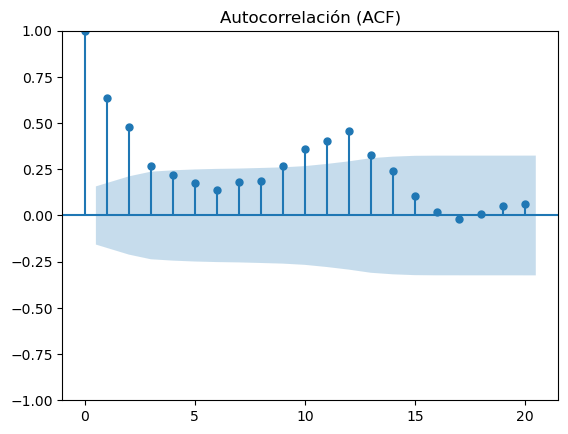

<Figure size 1200x600 with 0 Axes>

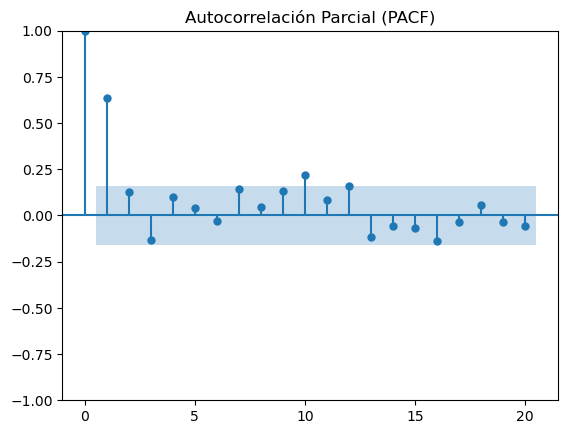

In [5]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# Graficar la función de autocorrelación (ACF)
plt.figure(figsize=(12, 6))
plot_acf(events_per_month, lags=20, alpha=0.05)
plt.title('Autocorrelación (ACF)')
plt.show()

# Graficar la función de autocorrelación parcial (PACF)
plt.figure(figsize=(12, 6))
plot_pacf(events_per_month, lags=20, alpha=0.05)
plt.title('Autocorrelación Parcial (PACF)')
plt.show()

In [17]:
from statsmodels.tsa.arima.model import ARIMA

# Ajustar un modelo ARIMA con los parámetros identificados
model_arima_events = ARIMA(events_per_month, order=(1, 0, 0))
results_arima_events = model_arima_events.fit()

# Mostrar el resumen del modelo ARIMA ajustado
results_arima_events.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  155
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -587.861
Date:                Sat, 24 Feb 2024   AIC                           1181.722
Time:                        01:26:43   BIC                           1190.852
Sample:                    02-01-2010   HQIC                          1185.430
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.4515      2.637     10.790      0.000      23.284      33.620
ar.L1          0.6515      0.056     11.559      0.000       0.541       0.762
sigma2       114.8767     11.048     10.398      0.000      93.222     136.531
===================================================================================
Ljung-Box (L1) (Q):                   1.54   Jarque-Bera (JB):                16.17
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             0.43
Prob(H) (two-sided):                  0.92   Kurtosis:                         4.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

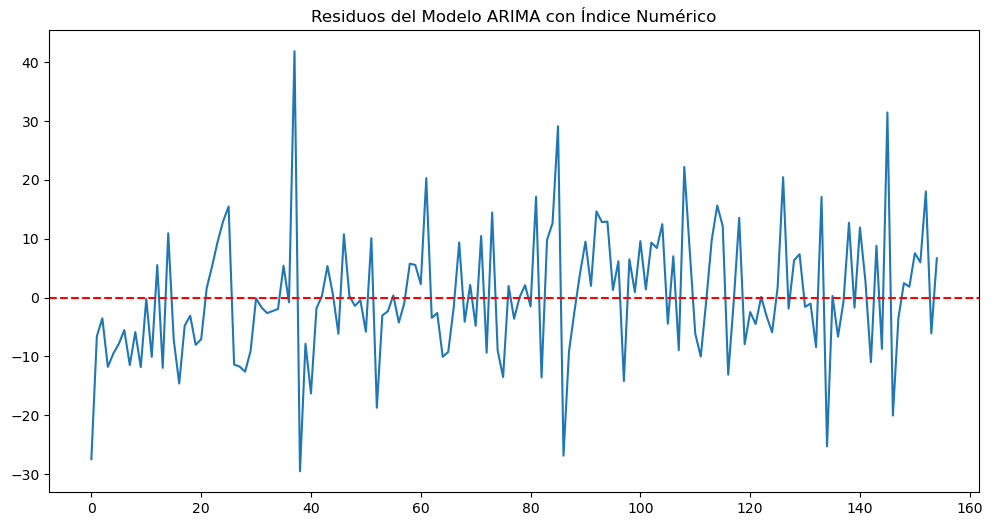

<Figure size 1200x600 with 0 Axes>

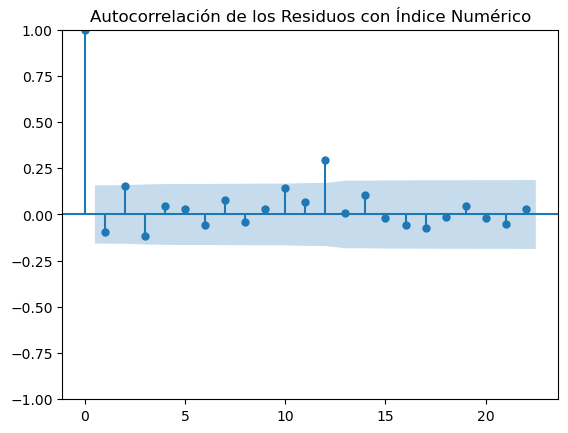

In [18]:
# Reindexar la serie de residuos con un rango numérico para facilitar la visualización
residuals = results_arima_events.resid
residuals_indexed = residuals.reset_index(drop=True)

# Gráfico de los residuos con índice numérico
plt.figure(figsize=(12, 6))
plt.plot(residuals_indexed)
plt.title('Residuos del Modelo ARIMA con Índice Numérico')
plt.axhline(0, linestyle='--', color='red')
plt.show()

# Función de autocorrelación de los residuos con índice numérico
plt.figure(figsize=(12, 6))
plot_acf(residuals_indexed, alpha=0.05)
plt.title('Autocorrelación de los Residuos con Índice Numérico')
plt.show()


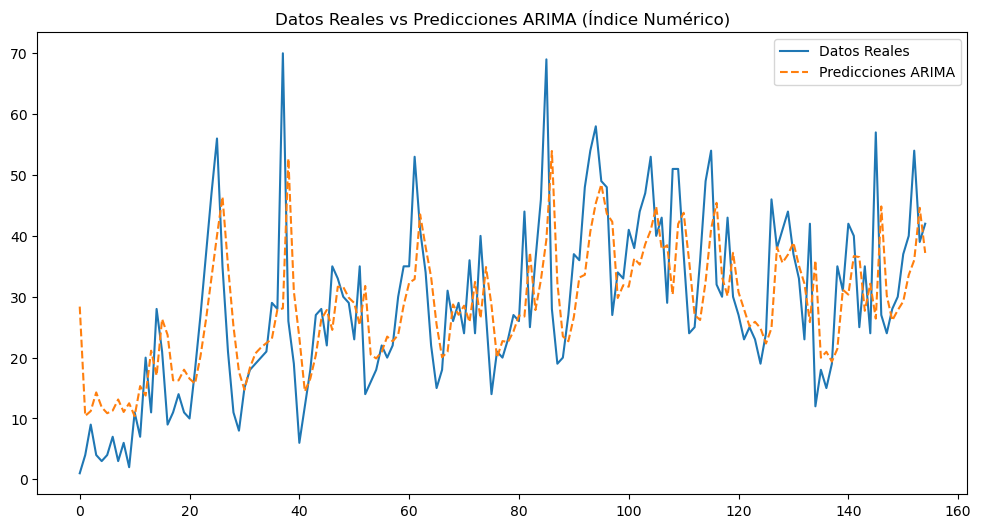

In [8]:
# Convertir el índice de 'events_per_month' y 'predictions' a un rango numérico para la visualización
events_per_month_indexed = events_per_month.reset_index(drop=True)
predictions = results_arima_events.predict(start=events_per_month.index[0], end=events_per_month.index[-1])
predictions_indexed = predictions.reset_index(drop=True)

# Gráfico de los datos reales vs las predicciones con índice numérico
plt.figure(figsize=(12, 6))
plt.plot(events_per_month_indexed, label='Datos Reales')
plt.plot(predictions_indexed, label='Predicciones ARIMA', linestyle='--')
plt.title('Datos Reales vs Predicciones ARIMA (Índice Numérico)')
plt.legend()
plt.show()


ValueError: x and y must have same first dimension, but have shapes (23,) and (24,)

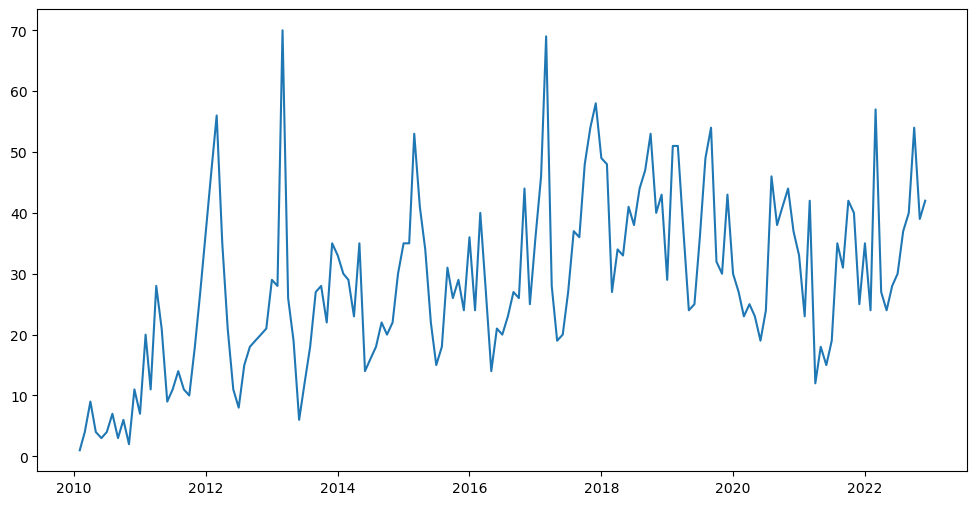

In [9]:
#import pandas as pd
#
## Suponiendo que 'events_per_month' es tu serie temporal
## Convertir el índice de PeriodIndex a DateTimeIndex si aún no se ha hecho
#events_per_month.index = events_per_month.index.to_timestamp()
#
## Ajustar el modelo ARIMA como antes
#from statsmodels.tsa.arima.model import ARIMA
#
## Asumiendo que ya tienes el modelo ajustado, continuamos desde la generación de predicciones
#n_periods = 24  # Número de periodos que quieres predecir hacia el futuro
#
## Generar fechas futuras para las predicciones
#start = events_per_month.index[-1] + pd.DateOffset(months=1)
#end = start + pd.DateOffset(months=n_periods - 1)
#
## Generar predicciones futuras
#forecast = results_arima_events.get_forecast(steps=n_periods)
#
## Obtener el pronóstico y los intervalos de confianza
#forecast_pred = forecast.predicted_mean
#forecast_conf_int = forecast.conf_int()
#
## Para graficar, asegúrate de que las fechas de las predicciones sean compatibles
#pred_dates = pd.date_range(start=start, end=end, freq='M')
#
## Visualizar las predicciones y los intervalos de confianza
#plt.figure(figsize=(12, 6))
#plt.plot(events_per_month.index, events_per_month, label='Datos Históricos')
#plt.plot(pred_dates, forecast_pred, label='Predicciones Futuras', color='red')
#plt.fill_between(pred_dates, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
#plt.title('Predicciones Futuras de Eventos Peligrosos')
#plt.legend()
#plt.show()


In [19]:
# Acceder a los valores predichos y convertirlos a un array de NumPy
forecast_values = forecast_pred.to_numpy()

# Acceder a los intervalos de confianza y convertirlos también a arrays de NumPy
lower_bounds = forecast_conf_int.iloc[:, 0].to_numpy()
upper_bounds = forecast_conf_int.iloc[:, 1].to_numpy()

# Mostrar los valores predichos y los intervalos de confianza
print("Valores Predichos:", forecast_values)
print("Intervalos de Confianza - Límite Inferior:", lower_bounds)
print("Intervalos de Confianza - Límite Superior:", upper_bounds)


Valores Predichos: [37.76940047 35.38169346 33.6013228  32.27380662 31.28395702 30.54588523
 29.99554913 29.58519634 29.27922075 29.05107301 28.88095685 28.75411138
 28.65953028 28.5890068  28.53642164 28.49721203 28.46797577 28.44617603
 28.42992126 28.41780105 28.40876374 28.40202515 28.39700058 28.39325407]
Intervalos de Confianza - Límite Inferior: [16.91125592 11.20556015  7.76410788  5.55769971  4.09148865  3.09214465
  2.39761644  1.90742071  1.55715355  1.30441118  1.12063034  0.98619049
  0.88738798  0.81451775  0.76062794  0.720693    0.69105346  0.66902952
  0.6526501   0.64046059  0.63138474  0.62462473  0.61958826  0.61583512]
Intervalos de Confianza - Límite Superior: [58.62754502 59.55782676 59.43853771 58.98991354 58.47642539 57.99962581
 57.59348183 57.26297198 57.00128796 56.79773484 56.64128336 56.52203226
 56.43167258 56.36349584 56.31221535 56.27373107 56.24489807 56.22332253
 56.20719242 56.19514151 56.18614273 56.17942556 56.17441291 56.17067302]


In [47]:
import pandas as pd

# Asumiendo que 'pred_dates' es un array de fechas de tus predicciones futuras
# y que ya tienes 'forecast_values', 'lower_bounds', y 'upper_bounds'
pred_dates = pd.date_range(start=events_per_month.index[-1] + pd.DateOffset(months=1), periods=n_periods, freq='M')

# Crear un DataFrame para contener los periodos, las predicciones y los intervalos de confianza
forecast_df = pd.DataFrame({
    'Fecha': pred_dates,
    'Predicción': forecast_values,
    'Límite Inferior': lower_bounds,
    'Límite Superior': upper_bounds
})

# Establecer la fecha como el índice del DataFrame si lo prefieres
forecast_df.set_index('Fecha', inplace=True)

# Mostrar el DataFrame resultante
print(forecast_df)


            Predicción  Límite Inferior  Límite Superior
Fecha                                                   
2023-01-31   37.769400        16.911256        58.627545
2023-02-28   35.381693        11.205560        59.557827
2023-03-31   33.601323         7.764108        59.438538
2023-04-30   32.273807         5.557700        58.989914
2023-05-31   31.283957         4.091489        58.476425
2023-06-30   30.545885         3.092145        57.999626
2023-07-31   29.995549         2.397616        57.593482
2023-08-31   29.585196         1.907421        57.262972
2023-09-30   29.279221         1.557154        57.001288
2023-10-31   29.051073         1.304411        56.797735
2023-11-30   28.880957         1.120630        56.641283
2023-12-31   28.754111         0.986190        56.522032
2024-01-31   28.659530         0.887388        56.431673
2024-02-29   28.589007         0.814518        56.363496
2024-03-31   28.536422         0.760628        56.312215
2024-04-30   28.497212         

In [52]:
# Asegurarse de que el índice sea de tipo DateTimeIndex
# Si 'Fecha' no es el índice, primero convertirlo a índice y asegurarse de que es de tipo DateTime
if not isinstance(forecast_df.index, pd.DatetimeIndex):
    forecast_df.set_index('Fecha', inplace=True)

# Convertir el índice a DateTimeIndex si aún no lo es
forecast_df.index = pd.to_datetime(forecast_df.index)

# Agrupar por año y sumar las predicciones y límites para cada año
summed_forecast_by_year = forecast_df.resample('Y').sum()
summed_forecast_by_year_int = summed_forecast_by_year.astype(int) 
summed_forecast_by_year_rounded = summed_forecast_by_year.round()

# Mostrar el resultado
print(summed_forecast_by_year)
print(summed_forecast_by_year_int)
print(summed_forecast_by_year_rounded)


            Predicción  Límite Inferior  Límite Superior
Fecha                                                   
2023-12-31  376.402173        57.895680       694.908666
2024-12-31  341.645088         8.327853       674.962324
            Predicción  Límite Inferior  Límite Superior
Fecha                                                   
2023-12-31         376               57              694
2024-12-31         341                8              674
            Predicción  Límite Inferior  Límite Superior
Fecha                                                   
2023-12-31       376.0             58.0            695.0
2024-12-31       342.0              8.0            675.0
